## Importing Libraries and dataset

## Importing Libraries and dataset

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('future.no_silent_downcasting', True)



In [93]:
df = pd.read_excel('/Users/syedsafiullah/Desktop/Online Internships/AI internship 6wk emp burnout analysis/Employee-Burnout-Analysis./Dataset/employee_burnout_analysis-AI 2.xlsx')


In [94]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [95]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [96]:

df.shape

(22750, 9)

## Data Preprocessing


In [99]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [101]:
df=df.dropna(subset=['Burn Rate'],axis=0).reset_index(drop=True)

In [102]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

In [103]:
for col in ['Resource Allocation','Mental Fatigue Score']:
  df[col]=df[col].fillna(df[col].mean())


In [104]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

## EDA


In [105]:
df=df.drop(['Date of Joining','Employee ID'],axis=1)
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.000000,3.8,0.16
1,Male,Service,Yes,1,2.000000,5.0,0.36
2,Female,Product,Yes,2,4.483831,5.8,0.49
3,Male,Service,Yes,1,1.000000,2.6,0.20
4,Female,Service,No,3,7.000000,6.9,0.52


In [106]:
df['Gender']=df['Gender'].replace({'Female':1,'Male':0})
df['Company Type']=df['Company Type'].replace({'Product':1,'Service':0})
df['WFH Setup Available']=df['WFH Setup Available'].replace({'Yes':1,'No':0})

df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1,0,0,2,3.000000,3.8,0.16
1,0,0,1,1,2.000000,5.0,0.36
2,1,1,1,2,4.483831,5.8,0.49
3,0,0,1,1,1.000000,2.6,0.20
4,1,0,0,3,7.000000,6.9,0.52


In [107]:
df.dtypes

Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [108]:
df.shape

(21626, 7)

## Importing Libraries for Prediction


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Test Train Model

In [110]:
Y=df['Burn Rate']
X=df.drop('Burn Rate',axis=1)

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0,shuffle=False)

## Model Selection


In [112]:
scaler=StandardScaler()

### Linear Regression


In [113]:
print(Y_test)

16219    0.52
16220    0.55
16221    0.46
16222    0.36
16223    0.41
         ... 
21621    0.41
21622    0.59
21623    0.72
21624    0.52
21625    0.61
Name: Burn Rate, Length: 5407, dtype: float64


In [114]:
print(Y_pred)

[0.54062142 0.52972418 0.32478411 ... 0.53317844 0.48441616 0.65886261]


In [115]:
lr=LinearRegression()
pipe=make_pipeline(scaler,lr)

pipe.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [116]:
Y_pred=pipe.predict(X_test)

In [117]:
print("MSE of Linear regression is: ",mean_squared_error(Y_test,Y_pred))
print("RMSE of Linear regression is: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Mean Absolute Error of Linear Regression is: ",mean_absolute_error(Y_test,Y_pred))
print()
print("R^2 Score of Linear regression is: ",r2_score(Y_test,Y_pred))

MSE of Linear regression is:  0.00494959970994304
RMSE of Linear regression is:  0.07035339160227487
Mean Absolute Error of Linear Regression is:  0.05362127161425442

R^2 Score of Linear regression is:  0.8718297494172389


(5407,)
(5407,)


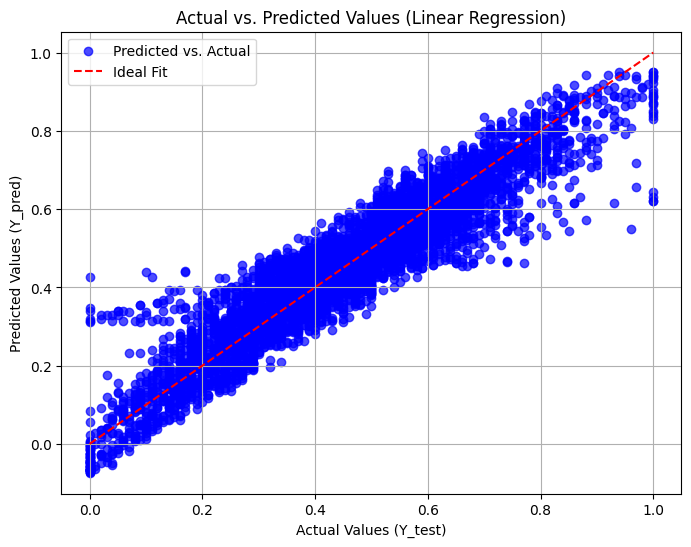

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten Y_test and Y_pred (if necessary) to 1D arrays
Y_test = np.array(Y_test).flatten()  # Ensure it becomes a 1D array
Y_pred = np.array(Y_pred).flatten()  # Ensure it becomes a 1D array

# Check the shapes again to make sure they are both (n,)
print(Y_test.shape)
print(Y_pred.shape)

# Plot: Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='blue', label='Predicted vs. Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
print(type(Y_test))  # Should be <class 'numpy.ndarray'>
print(type(Y_pred))  # Should be <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Ridge Regression

In [120]:
print(Y_test.shape)  # Should be (n,) or (n, 1)
print(Y_pred.shape)  # Should be (n,) or (n, 1)

(5407,)
(5407,)


In [121]:
ridge=Ridge()
pipe=make_pipeline(scaler,ridge)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [122]:
Y_pred_ridge=pipe.predict(X_test)

In [123]:
print("MSE of Ridge regression is: ",mean_squared_error(Y_test,Y_pred_ridge))
print("RMSE of Ridge regression is: ",np.sqrt(mean_squared_error(Y_test,Y_pred_ridge)))
print("Mean Absolute Error of Ridge Regression is: ",mean_absolute_error(Y_test,Y_pred_ridge))
print()
print("R^2 Score of Ridge regression is: ",r2_score(Y_test,Y_pred_ridge))

MSE of Ridge regression is:  0.004949596087576979
RMSE of Ridge regression is:  0.07035336585819459
Mean Absolute Error of Ridge Regression is:  0.05362137367530169

R^2 Score of Ridge regression is:  0.871829843218676


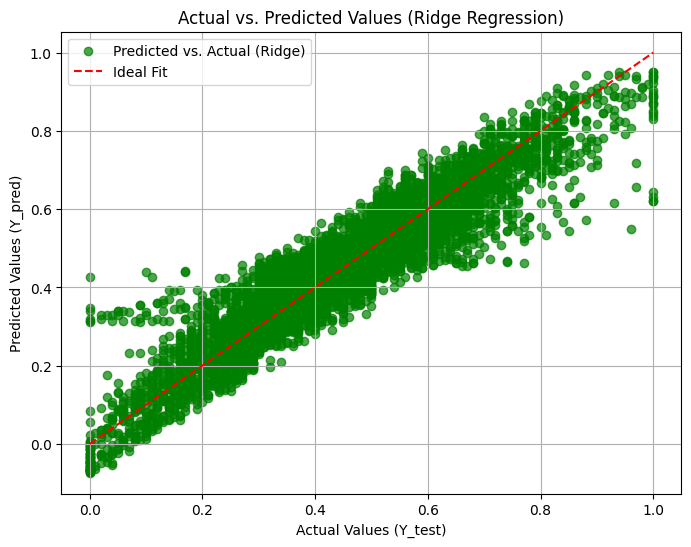

In [124]:
from sklearn.linear_model import Ridge

# Initialize and fit Ridge Regression model
ridge = Ridge()
pipe_ridge = make_pipeline(scaler, ridge)
pipe_ridge.fit(X_train, Y_train)

# Predict using the trained model
Y_pred_ridge = pipe_ridge.predict(X_test)

# Flatten the arrays to ensure they are 1D
Y_test_ridge = np.array(Y_test).flatten()
Y_pred_ridge = np.array(Y_pred_ridge).flatten()

# Plot: Actual vs. Predicted Values for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_ridge, Y_pred_ridge, alpha=0.7, color='green', label='Predicted vs. Actual (Ridge)')
plt.plot([min(Y_test_ridge), max(Y_test_ridge)], [min(Y_test_ridge), max(Y_test_ridge)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend()
plt.grid(True)
plt.show()


### K-Nearest Neighbors (KNN) Regressiona

In [59]:
knn_reg=KNeighborsRegressor(n_neighbors=5)
pipe=make_pipeline(scaler,knn_reg)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [60]:
Y_pred_knn=pipe.predict(X_test)

In [61]:
print("MSE of KNN regression is: ",mean_squared_error(Y_test,Y_pred_knn))
print("RMSE of KNN regression is: ",np.sqrt(mean_squared_error(Y_test,Y_pred_knn)))
print("Mean Absolute Error of KNN Regression is: ",mean_absolute_error(Y_test,Y_pred_knn))
print()
print("R^2 Score of KNN regression is: ",r2_score(Y_test,Y_pred_knn))

MSE of KNN regression is:  0.004169306454595893
RMSE of KNN regression is:  0.06457016690853365
Mean Absolute Error of KNN Regression is:  0.0502925836878121

R^2 Score of KNN regression is:  0.8920355009783147


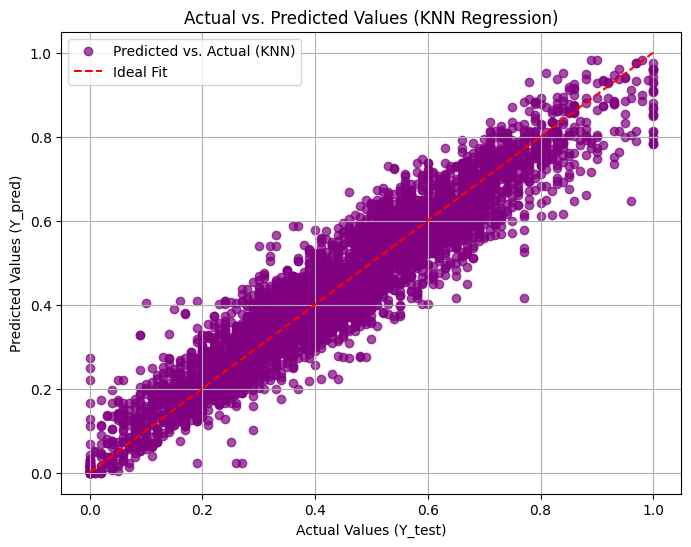

In [89]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit KNN Regression model
knn = KNeighborsRegressor(n_neighbors=5)
pipe_knn = make_pipeline(scaler, knn)
pipe_knn.fit(X_train, Y_train)

# Predict using the trained model
Y_pred_knn = pipe_knn.predict(X_test)

# Flatten the arrays to ensure they are 1D
Y_test_knn = np.array(Y_test).flatten()
Y_pred_knn = np.array(Y_pred_knn).flatten()

# Plot: Actual vs. Predicted Values for KNN Regression
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_knn, Y_pred_knn, alpha=0.7, color='purple', label='Predicted vs. Actual (KNN)')
plt.plot([min(Y_test_knn), max(Y_test_knn)], [min(Y_test_knn), max(Y_test_knn)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (KNN Regression)')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend()
plt.grid(True)
plt.show()
